# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



# SOLUCION PUNTO 1

a) Para solucionar las ecuaciones diferenciales primero vamos a definirlas 
\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}

Donde remplazaremos r por 
\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}

Como se observo en clase en el ejemplo de las ecuaciones diferenciales acopladas para el movimiento armonico. Al aplicar el Metodo Runge-Kutta para la resolucion de ecuaciones diferenciales es mejor deifnir las ecuaciones diferenciales en una sola funcion ya que hace mas sencilla la aplicaicon del metodo.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
#Definicion de la funcion tomando GM=1
def f(r):
  x, y, vx, vy = r #Definimos r como un vector que recibe los 4 valores de entrada de las condiciones iniciales.
  fx = -x / (x**2 + y**2)**(3/2)  #Segunda derivada de x respecto a t
  fy = -y / (x**2 + y**2)**(3/2)  #Segunda derivada de y respecto a t
  return np.array([vx, vy, fx, fy])  #Retornamos en la funcion un arreglo de numpy para facilitar la iteracion que vamos a reaslizar en el metodo Runge-Kutta

Copiamos la funcion creada para el metodoRunge-Kutta y luego creamos una funcion que aplique esta funcion a las dos ecuaciones diferenciales en nuestra funcion f(r).

In [68]:
#Funcion Runge-Kutta 
def rk(r, h):
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    return r + (k1 + 2*k2 + 2*k3 + k4) / 6

#Funcion para aplicar el metodo Runge=Kutta a nuestra f(r)
def s_e(x0, y0, vx0, vy0, t_max, h):
    t_ = np.arange(0, t_max, h)#Creamos e arreglo de valores del tiempo de 0 a un t max con un paso de h.
    num_points = len(t_)

    x_ = np.zeros(num_points)
    y_ = np.zeros(num_points)

    r = np.array([x0, y0, vx0, vy0])
    for i in range(num_points):
        x, y, vx, vy = r
        x_[i] = x
        y_[i] = y
        r = rk(r, h) #Aplicacion del metodo Runge-Kutta

    return t_, x_, y_ #Retorna los vlaores de t, x y y

Evaluemos las condiciones iniciales y grafiquemos.

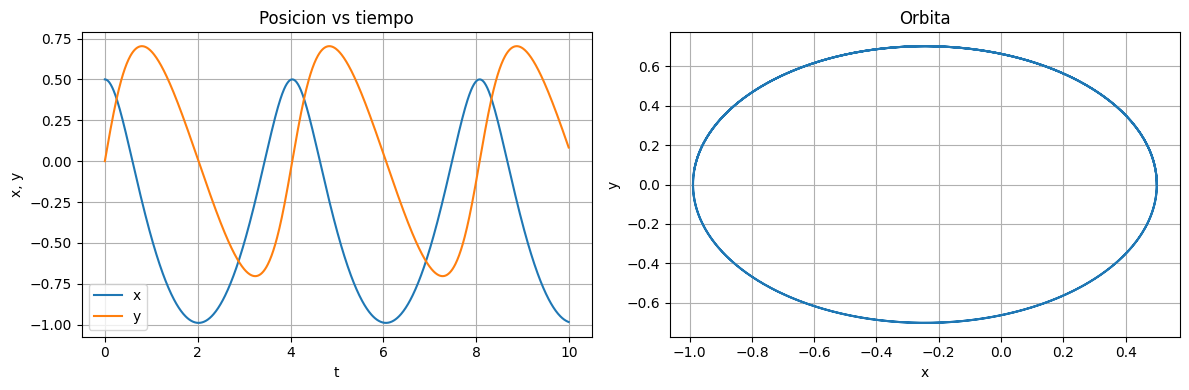

In [69]:
# Condiciones iniciales
x0 = 0.5
y0 = 0.0
vx0 = 0.0
vy0 = 1.63
t_max = 10
h = 0.01

# Resolvemos las ecuaciones con las ocndiciones iniciales dadas 
t, x, y = s_e(x0, y0, vx0, vy0, t_max, h)

# Crear el subplot con los dos graphs
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Graficamos x vs t y y vs t
axs[0].plot(t, x, label='x')
axs[0].plot(t, y, label='y')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x, y')
axs[0].set_title('Posicion vs tiempo')
axs[0].legend()
axs[0].grid()
# graficamos y vs x
axs[1].plot(x, y)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Orbita')

plt.tight_layout()
plt.grid()

Como muestran los resultados efectivamente la Ley de gravitacion universal de Newton cumple para estas condiciones un movimiento que decribe una elipse. Como vemos en el grafico de x,y vs t esto se da porque cuando la velocidad en t aumenta la velocidad en x disminuye. 


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



#  1. 
Para solucionar este punto vamos a eplear la herramienta ellipk de scipy.

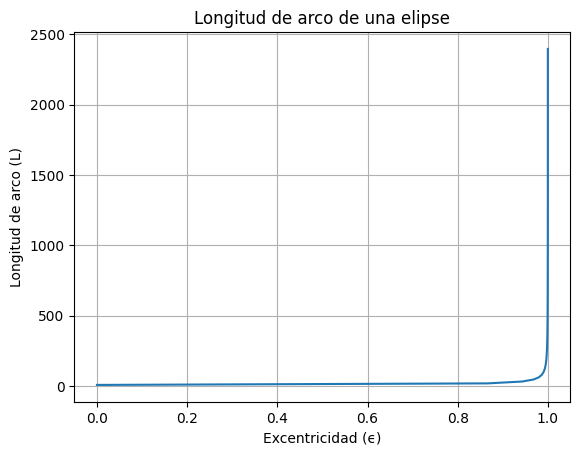

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

# Valores de a
a = np.linspace(1, 100, 100)

# Calcular excentricidad ϵ
epsilon = np.sqrt(a**2 - 1) / a

# Calcular la longitud de arco L para cada excentricidad
L = 4 * a * ellipk(epsilon**2)

# Graficar L vs ϵ
plt.plot(epsilon, L)
plt.xlabel('Excentricidad (ϵ)')
plt.ylabel('Longitud de arco (L)')
plt.title('Longitud de arco de una elipse')
plt.grid()



#2. 
Calculemos la longitud de arco para el problema uno en este caso podemos simplemente usar la formula de longitud de arco ya que tenemos los valores de ambas derivadas paraciales. Luego usamos la ufncion sum. para sumar todos los valores y obtener la longitud de la elipse. 



$L = \int \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2} dt$


In [75]:
# Calculemos la longitud de arco 
arc = np.sqrt(np.diff(x)**2 + np.diff(y)**2).sum() #Sumamos cada punto sobre la curva
arc

11.289323410613777


### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [77]:
import numpy as np

# Definir la matriz de rotación
theta = np.radians(45)  # Convertir theta a radianes
A = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])

# a) Encontrar el polinomio característico de A
polynomial = np.poly(A)
print("Polinomio característico:")
polynomial


Polinomio característico:


array([ 1.        , -1.41421356,  1.        ])

In [78]:
# b) Encontrar los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Autovalores:")
print(eigenvalues)
print("Autovectores:")
print(eigenvectors)

Autovalores:
[0.70710678+0.70710678j 0.70710678-0.70710678j]
Autovectores:
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


In [79]:

# c) Construir la matriz diagonal con los autovalores
diagonal_matrix = np.diag(eigenvalues)
print("Matriz diagonal:")
print(diagonal_matrix)

# Comprobar la solución: A = PDP^(-1)
reconstructed_A = eigenvectors @ diagonal_matrix @ np.linalg.inv(eigenvectors)
print("Reconstructed A:")
print(reconstructed_A)


Matriz diagonal:
[[0.70710678+0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j]]
Reconstructed A:
[[ 0.70710678+2.29934717e-17j  0.70710678+0.00000000e+00j]
 [-0.70710678+0.00000000e+00j  0.70710678+2.29934717e-17j]]
